In [3]:
"""
Upated December 31, 2021 to include molecular polarization and local field
Updated January 1, 2022 removing epsilon0 from calculation of molecular
polarizability and including it in calculation of chi
Updated January 1, 2022 putting back epison0 in calculation of molecular
polarizability
Updated January 1, 2022 adding a thermal occupation factor p0 for the lower
transition level
Changes 10**3 to 10**-3 in calc of N0, renamed to atomic_n.ipynb February 19, 2023
"""

import numpy as np
import scipy.special
from scipy.signal import convolve

# We need these constants and use MKS units
# They have been calculated using P=1 ATM, T=273K, and Mmolecule=40 mproton
e = 1.602e-19 # electronic charge in Coulomb
m = 9.11e-31 # electronic mass in kg
eps0 = 8.854e-12 # vacuum permitivity in F/m
c = 3.00e8 # speed of light in m/s
gamma_col = 8.4e9 # collision rate in radians per second
delta_omega_Dop = 3.52e9 # Doppler "rate" in radians per second
f = 0.057 # oscillator strength - the "reference" value from paper by Axner

# Lorentzian broadening line shape function

def gcol(omega,omega0):
    return (1/np.pi/gamma_col)*(1/(1+(omega-omega0)**2/(gamma_col)**2))

def gDop(omega,omega0):
    return ((1/delta_omega_Dop)*(np.sqrt(4*np.log(2)/np.pi))*
        np.exp(-4*(omega-omega0)**2*np.log(2)/delta_omega_Dop**2))

def wplot(omega,omega0):
    x = 1.67*(omega - omega0)/delta_omega_Dop
    b = 1.67*gamma_col/delta_omega_Dop
    z = x + 1j*b
    return np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z))

# Voigt broadening line shape function
def gV(omega,omega0):
    x = 1.67*(omega - omega0)/delta_omega_Dop
    b = 1.67*gamma_col/delta_omega_Dop
    z = x + 1j*b
    return 5.90/delta_omega_Dop*np.real(np.exp(-z**2)*scipy.special.erfc(-1j*z))/2/np.pi

# real and imaginary parts of the molecular polarizability
def re_gamma(omega,omega0,f):
    return (f*np.pi*e**2/2/m/omega0/eps0)*(omega0-omega)/gamma_col*gcol(omega,omega0)
def im_gamma(omega,omega0,f):
    return (f*np.pi*e**2/2/m/omega0/eps0)*gcol(omega,omega0)

# total molecular polarizability
def gamma(omega,omega0,f):
    return re_gamma(omega,omega0,f)+1j*im_gamma(omega,omega0,f)

# susceptibility taking into acount local field effects
def chi(omega,omega0,f,p0):
    N0 = p0 * 6.022e23*1e-3/22.4
    return N0*gamma(omega,omega0,f)/(1-N0*gamma(omega,omega0,f)/3)

def atomic_n(omega,omega0,f,p0,nbg):
    return np.sqrt(nbg ** 2 + chi(omega,omega0,f,p0))

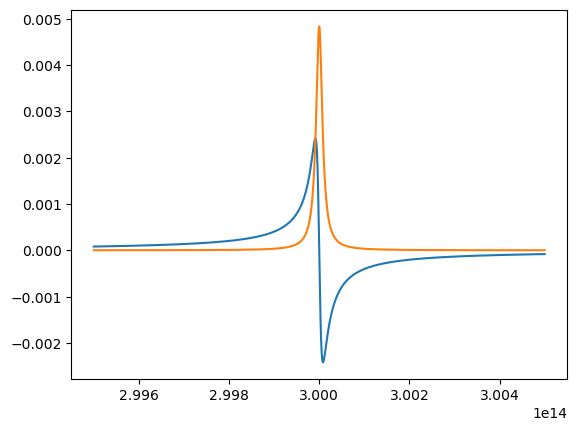

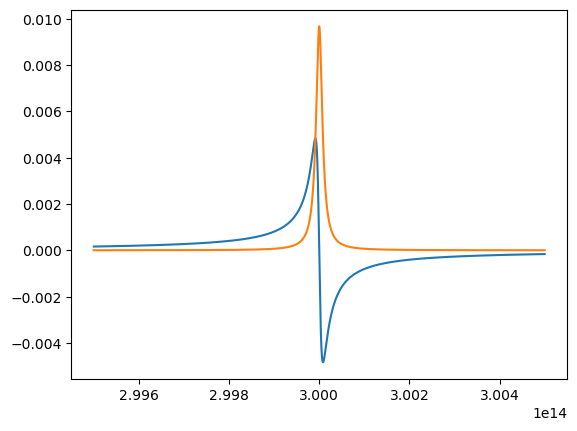

In [4]:
if __name__ == '__main__':
    import matplotlib.pyplot as plt
    omega0 = 3e14
    omega = 1e14 * np.linspace(2.995, 3.005, 10000)
    f = 0.57
    p0 = 1
    nbg = 1
    plt.plot(omega,np.real(atomic_n(omega,omega0,f,p0,nbg))-1)
    plt.plot(omega,np.imag(atomic_n(omega,omega0,f,p0,nbg)))
    plt.show()
    plt.clf()
    plt.plot(omega,np.real(chi(omega,omega0,f,p0)))
    plt.plot(omega,np.imag(chi(omega,omega0,f,p0)))